# Tina Liu 

## Research question/interests

Briefly describe your research question or interests here.

In this research, something I am interested in is whether or not gender plays a role in how well students perform. If so, I want to see if there is a correlation from other social aspects that might impact a students performance. I specifically want to look at the two different sex (male/female) in correlation to math, reading, and writing scores. Additionally, as a female, I have personally grown up with the stereotype that 'boys are smarter than girls' so through these data sets I want to be able to debunk that stereotype.  

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
import seaborn as sns

In [115]:
dp = pd.read_csv('../data/raw/exams.csv')

In [116]:
print(dp)

     gender race/ethnicity parental level of education         lunch  \
0      male        group A                 high school      standard   
1    female        group D            some high school  free/reduced   
2      male        group E                some college  free/reduced   
3      male        group B                 high school      standard   
4      male        group E          associate's degree      standard   
..      ...            ...                         ...           ...   
995    male        group C                 high school      standard   
996    male        group D          associate's degree  free/reduced   
997  female        group C            some high school  free/reduced   
998  female        group C                some college      standard   
999    male        group A                some college      standard   

    test preparation course  math score  reading score  writing score  
0                 completed          67             67         

In [117]:
print("Original number of rows and columns:", dp.shape)
print("All columns in data set: ", dp.columns)

Original number of rows and columns: (1000, 8)
All columns in data set:  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


# Task 2
## Data Analysis Pipeline 
    1. Load Data 
       - Check file types and encodings.
       - Skip rows and columns as needed. 
    2. Clean Data 
       - drop any columns not needed. 
       - deal with missing values. 
    3. Process Data 
       - creates new columns (weighted average) 
       - Deal with outliers 
    4. Wrangle Data 
       - Restructure columns and rows
        
        

For my data set, I simplified the data set to only look at 4 different columns: gender, math score, reading score, and writing score. I created another column that totals the average of all the scores for each person. 

In [118]:
dp = dp[dp['math score'].between(0.0,100.0)]
dp = dp[dp['reading score'].between(0.0,100.0)]
dp = dp[dp['writing score'].between(0.0,100.0)]
dp = dp.dropna()
dp = dp.rename(columns={'gender':'sex'})
dp = dp.drop(columns = ["race/ethnicity","parental level of education", "lunch", "test preparation course"])
dp['total score']=(dp['reading score']+dp['math score']+dp['writing score'])/3
dp

,sex,math score,reading score,writing score,total score
0,male,67,67,63,65.666667
1,female,40,59,55,51.333333
2,male,59,60,50,56.333333
3,male,77,78,68,74.333333
4,male,78,73,68,73.000000
...,...,...,...,...,...
995,male,73,70,65,69.333333
996,male,85,91,92,89.333333
997,female,32,35,41,36.000000
998,female,73,74,82,76.333333


Looks at the mean, standard deviation, min, and max for each score. I wanted to check if there were any outliers. 

In [119]:
dp.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,math score,reading score,writing score,total score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000,67.712000
std,15.402871,14.737272,15.600985,14.514244
min,13.000000,27.000000,23.000000,21.666667
25%,56.000000,60.000000,58.000000,58.583333
50%,66.500000,70.000000,68.000000,67.333333
75%,77.000000,79.000000,79.000000,78.333333
max,100.000000,100.000000,100.000000,100.000000


<AxesSubplot:ylabel='Frequency'>

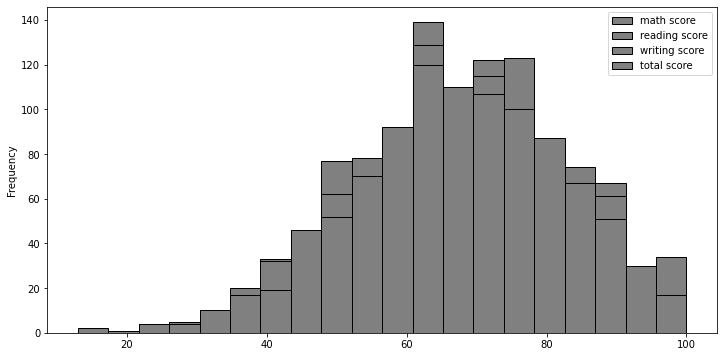

In [120]:
dp.plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

Task 2 - Milestone 3 

In [121]:
columns = ['gender','math score','reading score','writing score']
graph = pd.read_csv('../data/raw/exams.csv', usecols=columns) 
graph[['math score', 'reading score','writing score']].mean(axis=0, skipna=True)

math score       66.396
reading score    69.002
writing score    67.738
dtype: float64

### For this specific graph, I compared the two different sex (male/female) with their specific readings scores and seeing which gender has a higher standard deviation. 

<AxesSubplot:xlabel='gender', ylabel='reading score'>

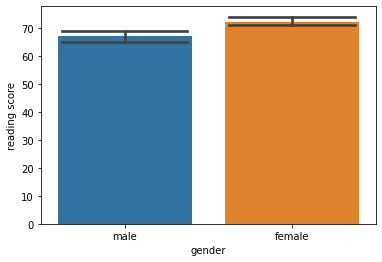

In [122]:
d = pd.read_csv('../data/raw/exams.csv')
sns.barplot(x='gender',y='reading score', data=d, estimator=np.median, capsize =0.75)

### For this specific graph, I compared the two different sex(male/female) with their specific math scores and seeing which gender has a higher standard deviation.  

<AxesSubplot:xlabel='gender', ylabel='math score'>

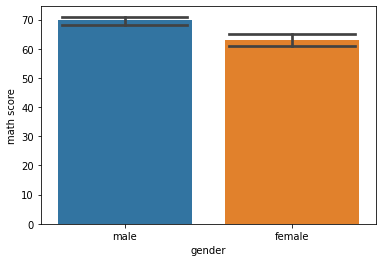

In [123]:
d = pd.read_csv('../data/raw/exams.csv')
sns.barplot(x='gender',y='math score', data=d,estimator=np.median, capsize = 0.75)

### For this specific graph, I compared the two different sex(male/female) with their specific writing scores and seeing which gender has a higher standard deviation.  

<AxesSubplot:xlabel='gender', ylabel='writing score'>

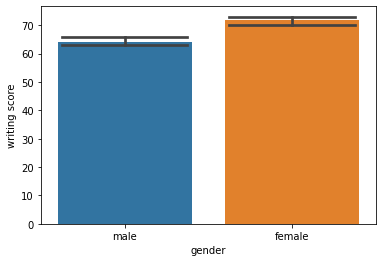

In [124]:
d = pd.read_csv('../data/raw/exams.csv')
sns.barplot(x='gender',y='writing score', data=d, estimator=np.median, capsize =0.75)

### For this specific graph, I compared the two different sex(male/female) with their averages of each writing, math, and reading scores and seeing which gender has a higher standard deviation.  

<AxesSubplot:xlabel='gender', ylabel='average score'>

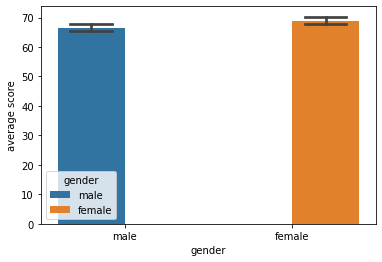

In [125]:
d = pd.read_csv('../data/raw/exams.csv')
d['average score']=(d['reading score']+d['math score']+d['writing score'])/3
sns.barplot(x='gender',y='average score', data=d, hue='gender', capsize =0.25)

## Task 3 - Milestone 3

In [126]:
d = pd.read_csv('../data/raw/exams.csv')

df = (
    pd.read_csv('../data/raw/exams.csv')
    .drop(columns = ["race/ethnicity","parental level of education", "test preparation course","lunch"])
    .dropna()
    .rename(columns={'gender': 'Sex', 'math score': 'Math Score', 'reading score': 'Reading Score', 'writing score': 'Writing Score'},)
    .assign(total=(d['reading score']+d['math score']+d['writing score'])/3)
)
print(df)
    

        Sex  Math Score  Reading Score  Writing Score      total
0      male          67             67             63  65.666667
1    female          40             59             55  51.333333
2      male          59             60             50  56.333333
3      male          77             78             68  74.333333
4      male          78             73             68  73.000000
..      ...         ...            ...            ...        ...
995    male          73             70             65  69.333333
996    male          85             91             92  89.333333
997  female          32             35             41  36.000000
998  female          73             74             82  76.333333
999    male          65             60             62  62.333333

[1000 rows x 5 columns]


In [133]:
import project_functions2 #relative path 
project_functions2.load_and_process(dp)
print(

TypeError: argument of type 'method' is not iterable

# Explatory Data Analysis

### Figure 1 

In [ ]:
d = pd.read_csv('../data/raw/exams.csv')
d['average score']=(d['reading score']+d['math score']+d['writing score'])/3
sns.barplot(x='gender',y='average score', data=d, hue='gender', capsize =0.25)

I wanted to check if there was a reason why females are performing better than males so I checked if females had more test preparation. 

### Figure 2 
In these graphs, they plot each score onto a graph. On average 

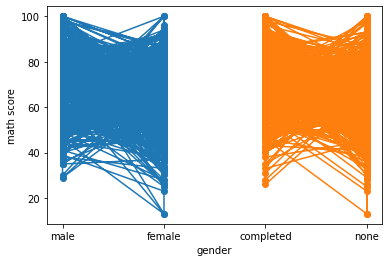

In [150]:
d = pd.read_csv('../data/raw/exams.csv')
fig, ax = plt.subplots()
ax.plot(d["gender"], d["math score"], marker="o")
ax.set_xlabel("gender")
ax.set_ylabel("math score")
ax.plot(d["test preparation course"], d["math score"], marker="o")
plt.show()

In [137]:
d = pd.read_csv('../data/raw/exams.csv')
list(d["test preparation course"].unique())

['completed', 'none']

## Conclusions 
After graphing out the averages of the 3 different standarized tests in relation to sex, females on average did better than men. The only test score where males did better than females is in math. On average, females did better than males by about 3/4%, revealing that females are generally smarter than males. In efforts to understand why and how they would do better, I looked at whether or not each sex had any test preparations prior to each score. 